<h1>Credit Card Fraud Detection</h1>

In [ ]:
import pandas as pd
import matplotlib as plt
import numpy as np
data=pd.read_csv("creditcard.csv")

In [35]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [36]:
data.shape

(284807, 31)

In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [38]:
data.isnull().values.any()

False

In [39]:
column_names=data.columns
column_names

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

<h1>Drop Time feature as I dont feel its corelated to Fraud</h1>

In [40]:
data=data.drop('Time',axis=1)
column_names=column_names.drop(['Time'])

In [41]:
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


<h1>Scale the features to standerize the range of Features</h1>

In [42]:
from sklearn import preprocessing

x = np.array(data) #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
data = pd.DataFrame(x_scaled)
data.columns=column_names

In [43]:
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.935192,0.766490,0.881365,0.313023,0.763439,0.267669,0.266815,0.786444,0.475312,0.510600,...,0.561184,0.522992,0.663793,0.391253,0.585122,0.394557,0.418976,0.312697,0.005824,0.0
1,0.978542,0.770067,0.840298,0.271796,0.766120,0.262192,0.264875,0.786298,0.453981,0.505267,...,0.557840,0.480237,0.666938,0.336440,0.587290,0.446013,0.416345,0.313423,0.000105,0.0
2,0.935217,0.753118,0.868141,0.268766,0.762329,0.281122,0.270177,0.788042,0.410603,0.513018,...,0.565477,0.546030,0.678939,0.289354,0.559515,0.402727,0.415489,0.311911,0.014739,0.0
3,0.941878,0.765304,0.868484,0.213661,0.765647,0.275559,0.266803,0.789434,0.414999,0.507585,...,0.559734,0.510277,0.662607,0.223826,0.614245,0.389197,0.417669,0.314371,0.004807,0.0
4,0.938617,0.776520,0.864251,0.269796,0.762975,0.263984,0.268968,0.782484,0.490950,0.524303,...,0.561327,0.547271,0.663392,0.401270,0.566343,0.507497,0.420561,0.317490,0.002724,0.0


<h1>Check the Class Distribution</h1>

In [44]:
data['Class'].value_counts()

0.0    284315
1.0       492
Name: Class, dtype: int64

In [45]:
Fraud=data[data['Class']==1]
NonFraud=data[data['Class']==0]

In [46]:
FraudStats=Fraud.describe()

In [47]:
NonFraudStats=NonFraud.describe()

In [48]:
FraudStats

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,...,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.0
mean,0.877224,0.805495,0.715537,0.453275,0.744502,0.248967,0.231430,0.791507,0.373865,0.391269,...,0.572983,0.510686,0.664835,0.368068,0.580233,0.433885,0.419659,0.314659,0.004757,1.0
std,0.115246,0.045279,0.123222,0.127372,0.036167,0.018682,0.043904,0.072919,0.086151,0.101324,...,0.062375,0.069723,0.023459,0.069474,0.044749,0.077048,0.025412,0.011106,0.009991,0.0
min,0.439247,0.678603,0.298431,0.193714,0.616903,0.198611,0.000000,0.345109,0.000000,0.000000,...,0.193973,0.095452,0.379490,0.108959,0.309503,0.237162,0.282444,0.275190,0.000000,1.0
25%,0.855749,0.779796,0.687634,0.357125,0.733451,0.237869,0.216830,0.783290,0.329383,0.348239,...,0.562153,0.485131,0.660352,0.323374,0.560261,0.383073,0.416141,0.310915,0.000039,1.0
50%,0.918498,0.795936,0.749467,0.437100,0.755464,0.248697,0.246870,0.792052,0.386692,0.413988,...,0.571025,0.512290,0.664347,0.374042,0.582867,0.426154,0.423800,0.316094,0.000360,1.0
75%,0.951172,0.819712,0.797971,0.533364,0.767161,0.258865,0.259593,0.804317,0.435640,0.454635,...,0.581543,0.538836,0.670013,0.420682,0.603532,0.490254,0.431758,0.320859,0.004122,1.0
max,0.994520,1.000000,0.876407,0.788963,0.840408,0.328111,0.300705,1.000000,0.578303,0.592131,...,1.000000,0.900117,0.746612,0.529304,0.701859,0.873881,0.472851,0.349233,0.082747,1.0


In [49]:
NonFraudStats

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,...,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.0
mean,0.958434,0.767192,0.837625,0.251582,0.765753,0.263044,0.265414,0.785375,0.462934,0.508925,...,0.561460,0.510030,0.665435,0.382259,0.577903,0.425434,0.416506,0.313121,0.003437,0.0
std,0.032785,0.017264,0.025290,0.062031,0.009135,0.013371,0.007181,0.012457,0.037527,0.021604,...,0.011554,0.033759,0.009230,0.081628,0.029227,0.078773,0.007380,0.006688,0.009735,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.071840,0.000000,0.246075,0.203734,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,0.942706,0.760933,0.822086,0.214247,0.761075,0.255310,0.261996,0.783147,0.440719,0.497697,...,0.557796,0.484728,0.663032,0.334475,0.560104,0.372021,0.415203,0.312049,0.000220,0.0
50%,0.958634,0.767934,0.840570,0.250937,0.765356,0.260274,0.265606,0.785622,0.461059,0.506821,...,0.560999,0.510345,0.665268,0.387770,0.578828,0.416917,0.416534,0.313351,0.000856,0.0
75%,0.980655,0.775704,0.855234,0.284628,0.769837,0.267038,0.268834,0.788885,0.483388,0.518139,...,0.564472,0.534681,0.667624,0.441506,0.597586,0.464762,0.418183,0.314706,0.002999,0.0
max,1.000000,0.966707,1.000000,1.000000,1.000000,1.000000,1.000000,0.986077,1.000000,1.000000,...,0.926040,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0


<h1>Split the Data into Training and Testing Data</h1>

In [50]:
from sklearn.model_selection import train_test_split
xTrain,xTest,yTrain,yTest=train_test_split(data.iloc[0:,0:-1],data.iloc[0:,-1],test_size=0.2,random_state=0)

In [51]:
print(xTrain.shape,yTrain.shape)

(227845, 29) (227845,)


In [52]:
print(xTest.shape,yTest.shape)

(56962, 29) (56962,)


<h1>Train Decision Tree Classifier</h1>

In [53]:
from sklearn.tree import DecisionTreeClassifier
DecisionTree=DecisionTreeClassifier()
DecisionTree.fit(xTrain,yTrain)

DecisionTreeClassifier()

In [19]:
yPredicted=DecisionTree.predict(xTest)

<h1>Accuracy Score of Decision Tree Classifier</h1>

In [54]:
from sklearn.metrics import accuracy_score
accuracy_score(yTest,yPredicted)

0.9992275552122467

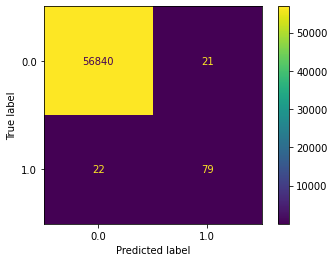

In [55]:
from sklearn.metrics import plot_confusion_matrix,classification_report
plot_confusion_matrix(model,xTest,yTest)

print(classification_report(yTest,yPredicted))

<h1>From Fraud Detection Perspective,Sensitivity is more important parameter than accuracy,lets check that</h1>

In [57]:
getStats(np.array(yTest),np.array(yPredicted))

tp= 79 tn= 56839 fp= 22 fn= 22 Sensitivity= 0.7821782178217822


<h1>Train Logistic Regression Model</h1>

In [58]:
from sklearn.linear_model import LogisticRegression
Logistic=LogisticRegression()
Logistic.fit(xTrain,yTrain)
yPredictedLogistic=Logistic.predict(xTest)

tp= 55 tn= 56853 fp= 8 fn= 46 Sensitivity= 0.5445544554455446


tp= 55 tn= 56853 fp= 8 fn= 46 Sensitivity= 0.5445544554455446


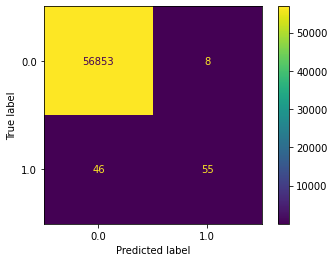

In [63]:
plot_confusion_matrix(Logistic,xTest,yTest)
getStats(np.array(yTest),np.array(yPredictedLogistic))

<h1>Train Random Forest Classifier</h1>

In [ ]:
from sklearn.ensemble import RandomForestClassifier
RandomForest=RandomForestClassifier()
RandomForest.fit(xTrain,yTrain)
yPredictedRandom=RandomForest.predict(xTest)

tp= 79 tn= 56854 fp= 7 fn= 22 Sensitivity= 0.7821782178217822


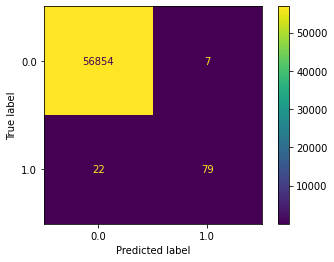

In [66]:
plot_confusion_matrix(RandomForest,xTest,yTest)
getStats(np.array(yTest),np.array(yPredictedRandom))

<h1>Train Support Vector Classifier</h1>

In [ ]:
from sklearn import svm
SVectorClassifier=svm.SVC()
SVectorClassifier.fit(xTrain,yTrain)
yPredictedSVC=SVectorClassifier.predict(xTest)

tp= 83 tn= 56843 fp= 18 fn= 18 Sensitivity= 0.8217821782178217


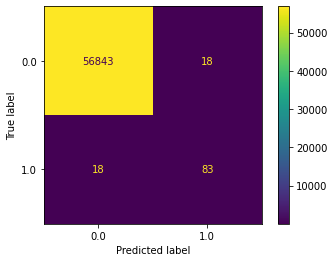

In [65]:
plot_confusion_matrix(SVectorClassifier,xTest,yTest)
getStats(np.array(yTest),np.array(yPredictedSVC))

<h1>Sensitivity of SVC is the highest</h1>

<h1>Function to calculate True-Positive,True-Negative,False-Positive,False-Negative and Sensitivity</h1>

In [24]:
def getStats(yTest,yPred):
    tp=0;fp=0;tn=0;fn=0;sensitivity=0;i=0;j=0;
    for i,j in zip(range(len(yTest)),range(len(yPred))):
        if(yTest[i]==yPred[j]==1):
            tp+=1
        elif(yTest[i]==yPred[j]==0):
            tn+=1
        elif(yTest[i]==0 and yPred[j]==1):  
            fp+=1
        elif(yTest[i]==1 and yPred[j]==0):
            fn+=1
    sensitivity=tp/(tp+fn)
    print("tp=",tp,"tn=",tn,"fp=",fp,"fn=",fn,"Sensitivity=",sensitivity)
    return   
    
    